**IFSP - Campus Campinas** <br>
**Pós-graduação em Ciência de Dados** <br>

**TCC - Avaliação de Projetos de Lei usando técnicas de NLP/ML**

#### Sprint 2 - v 1.2
- continuando com dados salvos no Sprint 1, já pre-processados com SpaCy
- pre-processamento com Neattext na coluna **'Ementa'** da PLO
- feature extraction com TfidfVectorizer na coluna **'Ementa'** da PLO
- treinamento com LogisticRegression
- rodado em PC local (não AWS)

Ref:  Natural Language Processing (NLP) 2023.1 - IFSP Campinas <br>
https://github.com/prof-samuka-IFSP/IFSP-CMP-D3TOP-2023.1/tree/main

Orientadora: Bianca Maria Pedrosa - IFSP Campinas<br>
Aluno: Swift Motoo Yaguchi - CP301665X

------

### 1. Pré-processamento

##### Instalando bibliotecas

In [1]:
#Upgrade dependencies
#!pip install --upgrade pip
#!pip install --upgrade scikit-learn
!pip install --upgrade wordcloud
#!pip install --upgrade sagemaker

In [2]:
#pip install scikit-learn==0.24.2

In [3]:
import pandas as pd
import numpy as np

##### Leitura da base de dados salvo no Sprint 1

In [4]:
# load the datasets
df_train = pd.read_csv('test_dataset_train.csv', sep=';', index_col=False)
df_test = pd.read_csv('test_dataset_test.csv', sep=';', index_col=False)

In [5]:
df_train

,Vereador,Partido,Aprovado,Ementa,Texto,Label
0,Paulo Galterio,PSB,não,denomina centro saúde zenir thiélfalo centro s...,art 1 fica denominado centro saúde zenir thiél...,0
1,Jorge da Farmácia,PSDB,sim,inclui dia municipal braille calendário oficia...,art i p fica incluído dia municipal braille ca...,1
2,Prefeito Municipal,Prefeito,sim,institui museu paz centro educação memória est...,câmara municipal aprovou prefeito município ca...,1
3,Carlão do PT,PT,sim,denomina base operacional ii maria cristina ...,art 1 0 fica denominada base operacional ii ...,1
4,Paulo Galterio,PSB,não,determina criação banco digital atestados médi...,art i q fica determinada criação banco digital...,0
...,...,...,...,...,...,...
291,Rodrigo da Farmadic,PP,não,dispõe obrigatoriedade instalação película tér...,1022021 conforme manifestação procuradoria leg...,0
292,Carmo Luiz,PSC,sim,institui fevereiro violeta dedicado realização...,art 1 2 fica instituído município campinas fev...,1
293,Nelson Hossri,PTN,não,dispõe criação bolsões eou espaços públicos ad...,09102019 conforme manifestação procuradoria le...,0
294,Jota Silva,PSB,sim,institui calendário oficial município campinas...,art i q fica instituído calendário oficial mun...,1


In [6]:
df_test

,Vereador,Partido,Aprovado,Ementa,Texto,Label
0,Luiz Rossini,PV,sim,inclui calendário oficial município campinas s...,art 1 2 fica incluída calendário oficial munic...,1
1,Gilberto Vermelho,PSDB,não,dispõe desembarque mulheres idosos pessoas def...,art 1 0 fica autorizado desembarque mulheres i...,0
2,Zé Carlos,PSB,sim,denomina rua josé hyppolito ferreira via públi...,art 1 0 fica denominada rua josé hyppolito fer...,1
3,Carmo Luiz,PSC,não,dispõe obrigatoriedade cartórios município cam...,art 1 2 tornase obrigatório cartórios âmbito m...,0
4,Ailton da Farmácia,PSD,sim,denomina rua josé lataro via pública município...,art 10 fica denominada rua josé lataro rua 01 ...,1
...,...,...,...,...,...,...
69,Vinicius Gratti,PSB,não,permite condução pessoas atendidas serviço ate...,art 1 2 fica permitida condução pessoas atendi...,0
70,Marcelo Silva,PSD,não,dispõe implantação programa bueiro inteligente...,art 10 fica implantado programa bueiro intelig...,0
71,Pedro Tourinho,PT,não,institui coleta seletiva lixo secretarias órgã...,art 1 0 fica instituída coleta seletiva lixo...,0
72,Fernando Mendes,PRB,sim,denomina praça umeo nakashima praça pública mu...,art 1 0 fica denominada praça umeo nakashima p...,1


##### Nova remoção usando biblioteca neattext na coluna 'Ementa'
- lowering, expand contractions
- remove:
  + punctuations, stop words, urls, emails, numbers, emojis, phone numbers, multiple whitespaces, currency symbols, special characters

In [7]:
import neattext.functions as ntx

def text_preprocessing(text_in: str) -> str:
    text = text_in.lower()
    text = ntx.fix_contractions(text)
    text = ntx.remove_punctuations(text)
    text = ntx.remove_stopwords(text)
    text = ntx.remove_urls(text)
    text = ntx.remove_emails(text)
    text = ntx.remove_numbers(text)
    text = ntx.remove_emojis(text)
    text = ntx.remove_phone_numbers(text)
    text = ntx.remove_multiple_spaces(text)
    text = ntx.remove_currency_symbols(text)
    text = ntx.remove_special_characters(text)
    return text

In [8]:
# progress bar in pandas
!pip install tqdm

In [9]:
from tqdm import tqdm
tqdm.pandas()  # it enables some new progress bar functions/methods for pandas

In [10]:
# pre-process the training set
df_train['Ementa-pre'] = df_train['Ementa'].progress_apply(lambda text: text_preprocessing(text))

100%|███████████████████████████████████████████████████████████████████████████████| 296/296 [00:00<00:00, 771.31it/s]


In [11]:
df_train.head()

,Vereador,Partido,Aprovado,Ementa,Texto,Label,Ementa-pre
0,Paulo Galterio,PSB,não,denomina centro saúde zenir thiélfalo centro s...,art 1 fica denominado centro saúde zenir thiél...,0,denomina centro sade zenir thilfalo centro sad...
1,Jorge da Farmácia,PSDB,sim,inclui dia municipal braille calendário oficia...,art i p fica incluído dia municipal braille ca...,1,inclui dia municipal braille calendrio oficial...
2,Prefeito Municipal,Prefeito,sim,institui museu paz centro educação memória est...,câmara municipal aprovou prefeito município ca...,1,institui museu paz centro educao memria estudo...
3,Carlão do PT,PT,sim,denomina base operacional ii maria cristina ...,art 1 0 fica denominada base operacional ii ...,1,denomina base operacional ii maria cristina vo...
4,Paulo Galterio,PSB,não,determina criação banco digital atestados médi...,art i q fica determinada criação banco digital...,0,determina criao banco digital atestados mdicos...


In [12]:
# pre-process the training set
df_test['Ementa-pre'] = df_test['Ementa'].progress_apply(lambda text: text_preprocessing(text))

100%|████████████████████████████████████████████████████████████████████████████████| 74/74 [00:00<00:00, 1396.97it/s]


In [13]:
df_test.head()

,Vereador,Partido,Aprovado,Ementa,Texto,Label,Ementa-pre
0,Luiz Rossini,PV,sim,inclui calendário oficial município campinas s...,art 1 2 fica incluída calendário oficial munic...,1,inclui calendrio oficial municpio campinas sem...
1,Gilberto Vermelho,PSDB,não,dispõe desembarque mulheres idosos pessoas def...,art 1 0 fica autorizado desembarque mulheres i...,0,dispe desembarque mulheres idosos pessoas defi...
2,Zé Carlos,PSB,sim,denomina rua josé hyppolito ferreira via públi...,art 1 0 fica denominada rua josé hyppolito fer...,1,denomina rua jos hyppolito ferreira pblica mun...
3,Carmo Luiz,PSC,não,dispõe obrigatoriedade cartórios município cam...,art 1 2 tornase obrigatório cartórios âmbito m...,0,dispe obrigatoriedade cartrios municpio campin...
4,Ailton da Farmácia,PSD,sim,denomina rua josé lataro via pública município...,art 10 fica denominada rua josé lataro rua 01 ...,1,denomina rua jos lataro pblica municpio campinas


In [14]:
# save the preprocessed datasets
df_train.to_csv('test_dataset_train_preprocessed_2.csv', sep=';', index=False)
df_test.to_csv('test_dataset_test_preprocessed_2.csv', sep=';', index=False)

#### 2.1 Word Cloud for Train Set

In [15]:
# classes/genres
notas = sorted(df_train['Vereador'].unique())
print(notas)

['Ailton da Farmácia', 'Aurélio Cláudio', 'Campos Filho', 'Carlão do PT', 'Carmo Luiz', 'Cidão Santos', 'Cláudio da Farmácia', 'Dr. Elcio Batista', 'Fernando Mendes', 'Filipe Marchesi', 'Gilberto Vermelho', 'Guida Calixto', 'Gustavo Petta', 'Jorge Schneider', 'Jorge da Farmácia', 'Jota Silva', 'Juscelino da Barbarense', 'Luiz Cirilo', 'Luiz Rossini', 'Marcelo Silva', 'Marcos Bernardelli', 'Mariana Conti', 'Mesa da Câmara', 'Nelson Hossri', 'Paulo Galterio', 'Paulo Haddad', 'Pedro Tourinho', 'Permínio Monteiro', 'Pr. Elias Azevedo', 'Prefeito Municipal', 'Professor Alberto', 'Rodrigo da Farmadic', 'Rubens Gás', 'Tenente Santini', 'Vinicius Gratti', 'Zé Carlos']


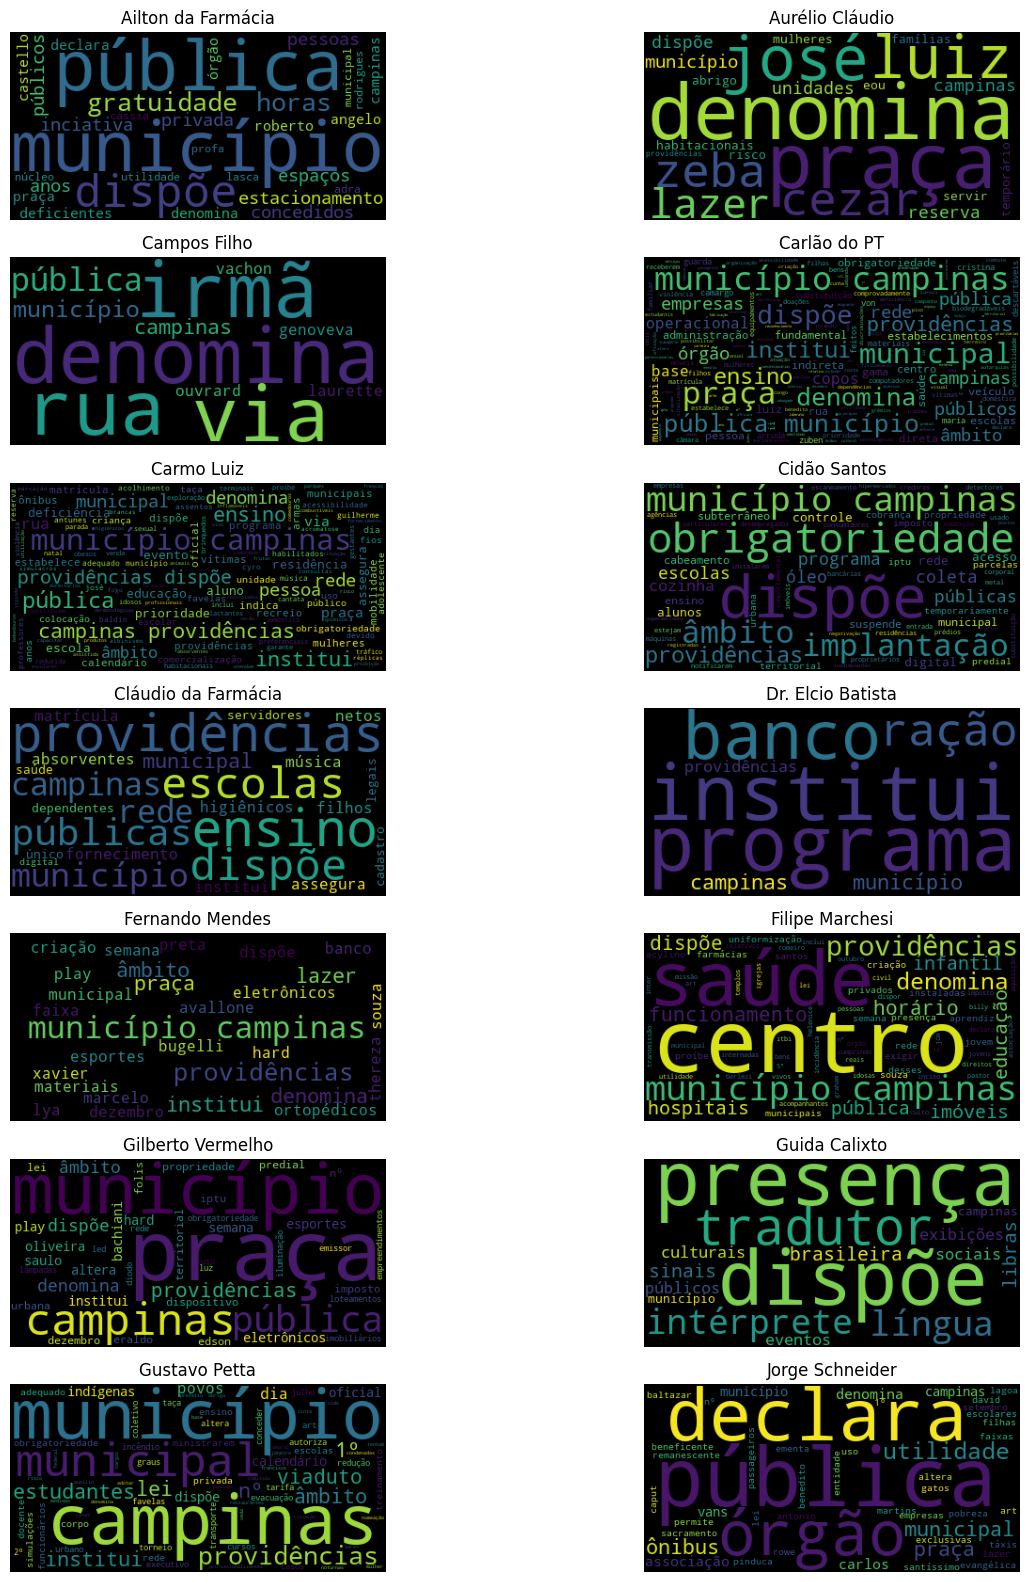

In [16]:
# plot a word cloud for each genre
import matplotlib.pyplot as plt
from wordcloud import WordCloud

fig, axes = plt.subplots(7, 2, figsize=(15, 20))
idx = 0
for row in range(7):
    for col in range(2):
        nota = notas[idx]
        
        df_nota = df_train.query("Vereador == @nota")

        text = ' '.join(df_nota['Ementa'])
        wordcloud = WordCloud().generate(text)
        axes[row, col].imshow(wordcloud)
        axes[row, col].set_title(f'{nota}')
        axes[row, col].axis('off')

        idx += 1

### 3. Feature Extraction

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

X_train = tfidf.fit_transform(df_train['Ementa-pre'])
y_train = df_train['Label']

X_test = tfidf.transform(df_test['Ementa-pre'])
y_test = df_test['Label']

In [18]:
X_train.shape, X_test.shape

((296, 1288), (74, 1288))

In [19]:
print(f'Vocabulary size: {len(tfidf.vocabulary_)}')

Vocabulary size: 1288


### 5. Treinamento de modelos

In [20]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced', n_jobs=-1)

logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', n_jobs=-1)

In [21]:
# prediction on training set
y_train_pred = logreg.predict(X_train)

In [22]:
from sklearn.metrics import classification_report

#print(classification_report(y_train, y_train_pred, target_names=target_names))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       151
           1       0.98      0.94      0.96       145

    accuracy                           0.96       296
   macro avg       0.96      0.96      0.96       296
weighted avg       0.96      0.96      0.96       296



In [23]:
from sklearn.metrics import f1_score

f1_train = f1_score(y_train, y_train_pred, average='macro')

print(f'F1 Train: {f1_train}')

F1 Train: 0.9593927199561003


In [24]:
from sklearn.metrics import balanced_accuracy_score

balacc_train = balanced_accuracy_score(y_train, y_train_pred)

print(f'Balanced Acc Train: {balacc_train}')

Balanced Acc Train: 0.9590317424069422


#### Evaluate the model on the Test Set

In [25]:
# prediction on testing set
y_test_pred = logreg.predict(X_test)

In [26]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        38
           1       0.86      0.86      0.86        36

    accuracy                           0.86        74
   macro avg       0.86      0.86      0.86        74
weighted avg       0.86      0.86      0.86        74



In [27]:
from sklearn.metrics import f1_score
f1_test = f1_score(y_test, y_test_pred, average='macro')
print(f'F1 Test: {f1_test}')

F1 Test: 0.8647660818713451


O resultado **F1 score** piorou um pouco em relação ao Sprint 1

In [28]:
from sklearn.metrics import balanced_accuracy_score

balacc_test = balanced_accuracy_score(y_test, y_test_pred)

print(f'Balanced Acc Test: {balacc_test}')

Balanced Acc Test: 0.8647660818713451


### Comparação entre os resultados do sprint 1 e do sprint 2:
#### Sprint                   1         2       

- Precision (treino)       0.94      0.94
- Recall (treino)          0.99      0.98
- F1-score (treino)        0.96      0.96
- Acuracy (treino)          0.96      0.96

- Precision (treino)       0.89      0.87
- Recall (treino)          0.89      0.86
- F1-score (treino)        0.89      0.86
- Acuracy (treino)          0.89      0.86
0.86

Os resultados das métricas no sprint 2 parecem que pioraram se comparado aos resultados das métricas no sprint 1. A precisão, o recall e o F1-score do modelo no conjunto de teste diminuíram em 2%, 3% e 3%, respectivamente. A acurácia do modelo no conjunto de teste também diminuiu em 1%.

No entanto, é importante notar que o tamanho do conjunto de teste no sprint 2 é menor do que o tamanho do conjunto de teste no sprint 1. Isso significa que os resultados do sprint 2 podem ser mais propensos a flutuações aleatórias.

Além disso, o modelo no sprint 2 foi treinado com uma nova característica, a ementa do projeto de lei. É possível que a ementa não seja uma característica tão importante quanto o texto do projeto de lei para a classificação de projetos de lei.

Portanto, é possível que os resultados do sprint 2 não sejam uma representação precisa do desempenho real do modelo. Para obter uma avaliação mais precisa do desempenho do modelo, é necessário aumentar o tamanho do conjunto de teste e explorar outras técnicas de NLP/ML.